https://www.kaggle.com/pablorr10/algoritmos-de-machine-learning-con-python-spa

http://www.aprendemachinelearning.com/regresion-logistica-con-python-paso-a-paso/

https://relopezbriega.github.io/blog/2015/10/10/machine-learning-con-python/


In [1]:
import pandas as pd
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset

,X1,X2,Y
0,2.781084,2.550537,0
1,1.465489,2.362125,0
2,3.396562,4.400294,0
3,1.388070,1.850220,0
4,3.064072,3.005306,0
5,7.627531,2.759262,1
6,5.332441,2.088627,1
7,6.922597,1.771064,1
8,8.675419,-0.242069,1
9,7.673756,3.508563,1


In [4]:
# descriptions
print(dataset.describe())

              X1         X2          Y
count  10.000000  10.000000  10.000000
mean    4.832702   2.405393   0.500000
std     2.746105   1.225863   0.527046
min     1.388070  -0.242069   0.000000
25%     2.851831   1.909822   0.000000
50%     4.364501   2.456331   0.500000
75%     7.451298   2.943795   1.000000
max     8.675419   4.400294   1.000000


In [6]:
# class distribution
print(dataset.groupby('Y').size())

Y
0    5
1    5
dtype: int64


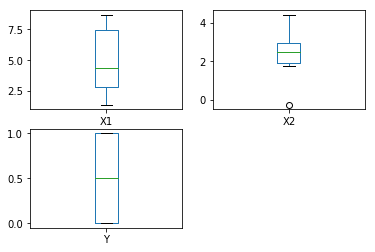

In [7]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

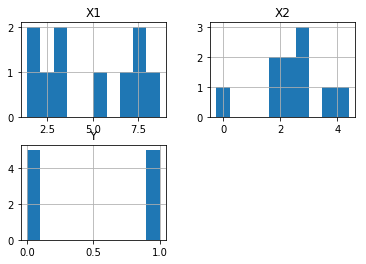

In [8]:
# histograms
dataset.hist()
pyplot.show()

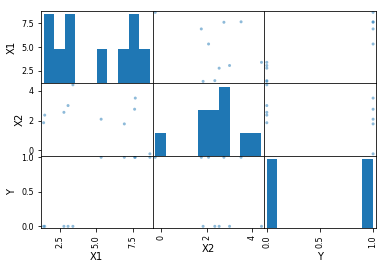

In [9]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

In [10]:
array = dataset.values
X = array[:,0:2]
Y = array[:,2]

In [11]:
X

array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],
       [ 3.39656169,  4.40029353],
       [ 1.38807019,  1.85022032],
       [ 3.06407232,  3.00530597],
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

In [12]:
Y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1.])

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [13]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=42)

In [14]:
X_train

array([[2.7810836 , 2.550537  ],
       [6.92259672, 1.77106367],
       [3.39656169, 4.40029353],
       [7.67375647, 3.50856301],
       [3.06407232, 3.00530597],
       [1.38807019, 1.85022032],
       [5.33244125, 2.08862677]])

In [15]:
X_test

array([[ 8.67541865, -0.24206865],
       [ 1.46548937,  2.36212508],
       [ 7.62753121,  2.75926224]])

In [16]:
y_train

array([0., 1., 0., 1., 0., 0., 1.])

In [17]:
y_test

array([1., 0., 1.])

In [22]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=2, random_state=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
LDA: 0.875000 (0.125000)
CART: 1.000000 (0.000000)
NB: 0.750000 (0.250000)
SVM: 0.750000 (0.250000)


/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/felipemartinezs/.local/lib/python3.5/site-packages/sklea

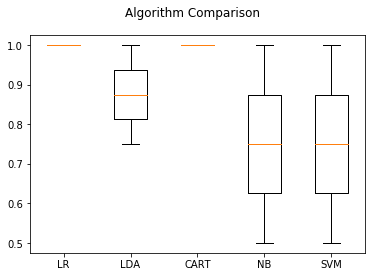

In [23]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [24]:
clf = LogisticRegression()

In [25]:
clf.fit(X, Y)

/home/felipemartinezs/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
predictions = clf.predict(X_test)
predictions

array([1., 0., 1.])

In [27]:
clf.predict_proba(X_test) 

array([[0.00108575, 0.99891425],
       [0.87018966, 0.12981034],
       [0.06836564, 0.93163436]])

In [28]:
clf.score(X, Y)

1.0

In [34]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[1 0]
 [0 2]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         2

   micro avg       1.00      1.00      1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

